In [10]:
%load_ext autoreload
import matplotlib.pyplot as plt
import numpy as np
import os
from source import TelExam
import csv
import scipy.signal as sig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
%autoreload
# Initialisation of a TelExam object
project = TelExam()
print("project.folderpath = ", project.folder_path)

project.folderpath =  C:\Users\bherr\Downloads\IBM2122-TelExam


In [12]:
# Get maximum voluntary contraction (MVC) signal for calibration
# data_mvc, data_amount_mvc = project.get_data('ang_emg.txt')
# rms_value = project.mvc_calibration(data_mvc[915:1119,:]) # selected interval for the same ang_emg file

In [13]:
# Get angle and EMG data for analysis
# 0 theta_x, 1 theta_y, 2 theta_z, 3 EMG1, 4 EMG2

datacondolor, data_amount_condolor = project.get_data('ValidacionCaminataConDolor.txt')
print("shape datacondolor: ", np.shape(datacondolor))
# 1740 datos en 95 segundos: 18.31 Hz promedio

datacondolor = datacondolor[670:1700,:]
# project.plot_data(datacondolor, data_amount_condolor)

cd_1 = datacondolor[50:335,:]
cd_2 = datacondolor[360:610,:]
cd_3 = datacondolor[650:905,:]

# project.plot_data(cd_1, data_amount_condolor) 
# project.plot_data(cd_2, data_amount_condolor)
# project.plot_data(cd_3, data_amount_condolor)

theta_x_condolor = datacondolor[:,0]
theta_y_condolor = datacondolor[:,1]
theta_z_condolor = datacondolor[:,2]

emg_vm_condolor, delta1 = project.remove_offset(datacondolor[:,3])
emg_gc_condolor, delta2 = project.remove_offset(datacondolor[:,4])

# project.plot_data(theta_x_condolor, 1)
# project.plot_data(theta_y_condolor, 1)
# project.plot_data(theta_z_condolor, 1)
# project.plot_data(emg_vm_condolor, 1)
# project.plot_data(emg_gc_condolor, 1)

datasindolor, data_amount_sindolor = project.get_data('ValidacionCaminataLarga.txt')
print("shape datasindolor: ", np.shape(datasindolor))
# 2080 datos en 116 segundos: 17.93 Hz promedio

datasindolor = datasindolor[1150:2000,:]

sd_1 = datasindolor[25:210,:]
sd_2 = datasindolor[260:460,:]
sd_3 = datasindolor[490:680,:]

# project.plot_data(sd_1, data_amount_condolor) # 0 theta_x, 1 theta_y, 2 theta_z, 3 EMG1, 4 EMG2
# project.plot_data(sd_2, data_amount_condolor)
# project.plot_data(sd_3, data_amount_condolor)


# project.plot_data(datasindolor, data_amount_sindolor)

theta_x_sindolor = datasindolor[:,0]
theta_y_sindolor = datasindolor[:,1]
theta_z_sindolor = datasindolor[:,2]

emg_vm_sindolor, delta3 = project.remove_offset(datasindolor[:,3])
emg_gc_sindolor, delta4 = project.remove_offset(datasindolor[:,4])

# project.plot_data(theta_x_sindolor, 1)
# project.plot_data(theta_y_sindolor, 1)
# project.plot_data(theta_z_sindolor, 1)
# project.plot_data(emg_vm_sindolor, 1)
# project.plot_data(emg_gc_sindolor, 1)

# freq, y = project.generate_fft_and_plot(datacd)
# t, filtered_data = project.low_pass(freq, y)
# data_rms = project.rms(emg_data)
# filtered_data_rms = project.rms(filtered_data)
# project.eda_process(data[:,4], sampling_rate=37)

shape datacondolor:  (1740, 5)
shape datasindolor:  (2080, 5)


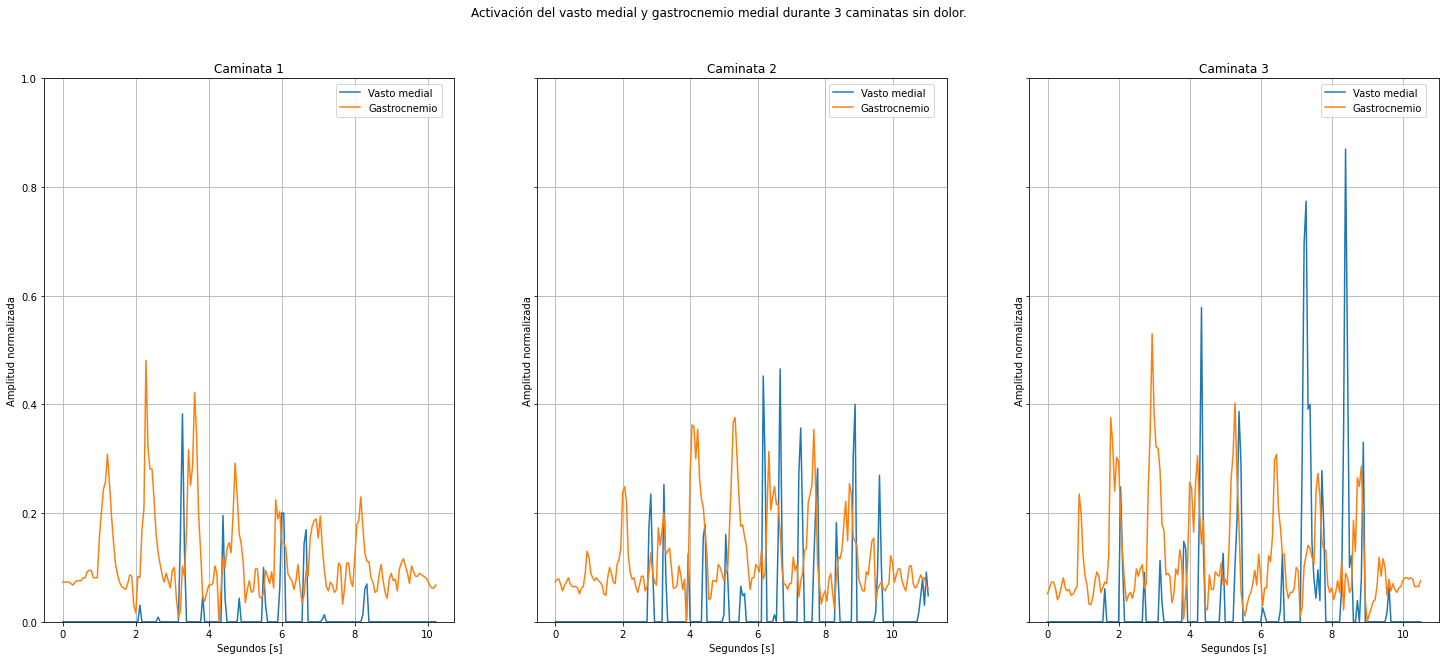

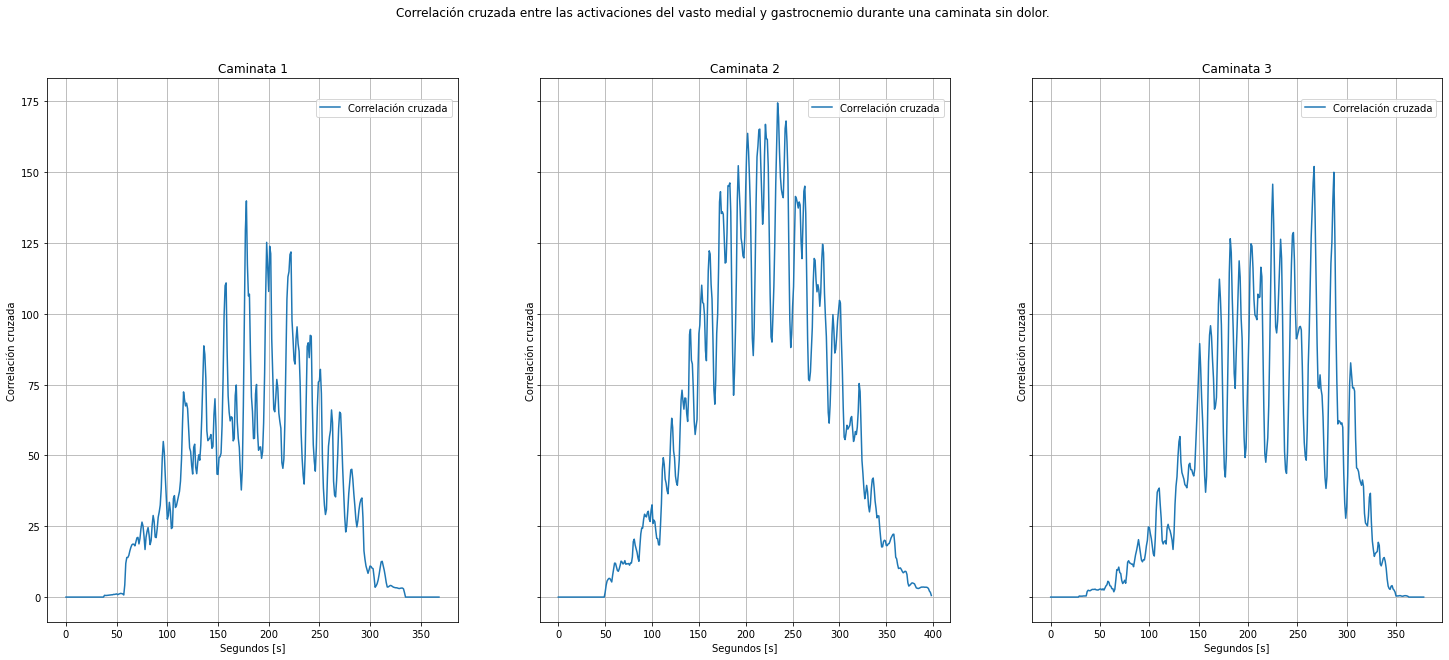

In [14]:
data_to_show = (sd_1, sd_2, sd_3)

freq_sample = 18

fig, ax = plt.subplots(1,3, sharey=True)
fig.set_size_inches(25,10)
for i in range(len(data_to_show)):
    emg_vm_current, d = project.remove_offset(data_to_show[i][:,3])
    emg_gc_current, d = project.remove_offset(data_to_show[i][:,4])

    x = np.arange(np.shape(emg_vm_current)[0])/freq_sample

    ax[i].plot(x, emg_vm_current/230, label="Vasto medial")
    ax[i].plot(x, emg_gc_current/370, label="Gastrocnemio")
    ax[i].set_xlabel("Segundos [s]")
    ax[i].set_ylabel("Amplitud normalizada")
    ax[i].set_ylim(0,1)
    ax[i].set_title(f"Caminata {i+1}")
    ax[i].tick_params("y")
    ax[i].legend(loc="lower center", bbox_to_anchor=(0.84,0.92))
    ax[i].grid(True)

fig.suptitle("Activación del vasto medial y gastrocnemio medial durante 3 caminatas sin dolor.")
plt.show()


fig, ax = plt.subplots(1,3, sharey=True)
fig.set_size_inches(25,10)
for i in range(len(data_to_show)):
    emg_vm_current, d = project.remove_offset(data_to_show[i][:,3])
    emg_gc_current, d = project.remove_offset(data_to_show[i][:,4])

    correlation = np.correlate(emg_vm_current, emg_gc_current, 'full')
    # print(np.shape(emg_vm_current))
    var_vm = np.var(emg_vm_current)
    var_gc = np.var(emg_gc_current)
    # print(var_vm)

    x = np.arange(np.shape(correlation)[0])

    ax[i].plot(x, correlation/np.sqrt(var_vm*var_gc), label="Correlación cruzada")
    ax[i].set_xlabel("Segundos [s]")
    ax[i].set_ylabel("Correlación cruzada")
    # ax[i].set_ylim(0,1)
    ax[i].set_title(f"Caminata {i+1}")
    ax[i].tick_params("y")
    ax[i].legend(loc="lower center", bbox_to_anchor=(0.82,0.92))
    ax[i].grid(True)

fig.suptitle("Correlación cruzada entre las activaciones del vasto medial y gastrocnemio durante una caminata sin dolor.")
plt.show()




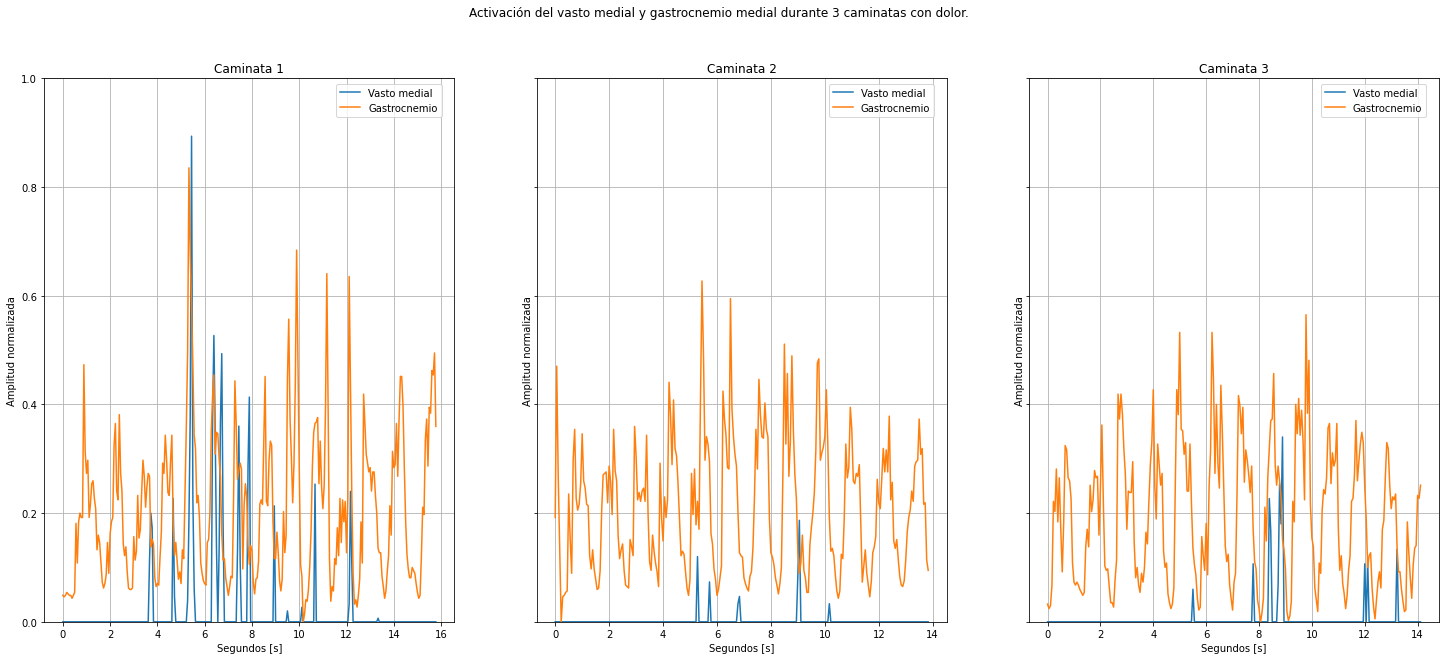

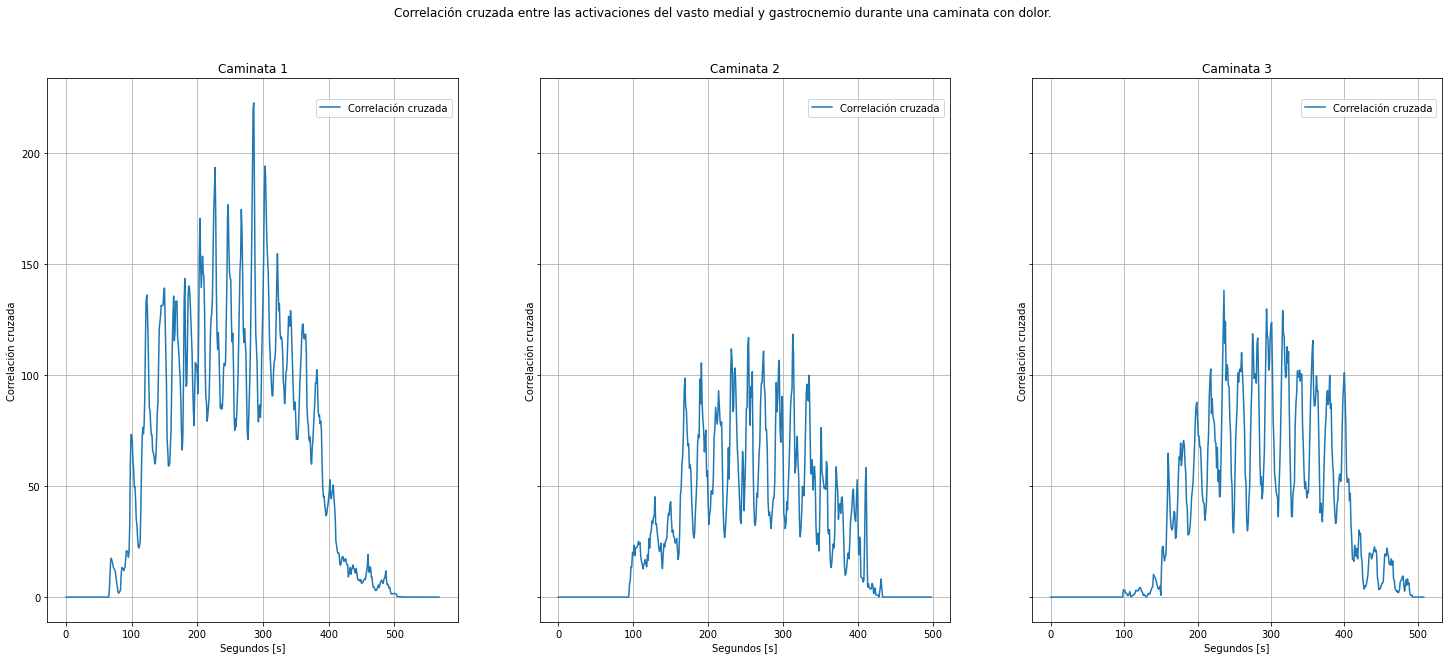

In [15]:
data_to_show = (cd_1, cd_2, cd_3)

freq_sample = 18

fig, ax = plt.subplots(1,3, sharey=True)
fig.set_size_inches(25,10)
for i in range(len(data_to_show)):
    emg_vm_current, d = project.remove_offset(data_to_show[i][:,3])
    emg_gc_current, d = project.remove_offset(data_to_show[i][:,4])

    x = np.arange(np.shape(emg_vm_current)[0])/freq_sample

    ax[i].plot(x, emg_vm_current/150, label="Vasto medial")
    ax[i].plot(x, emg_gc_current/370, label="Gastrocnemio")
    ax[i].set_xlabel("Segundos [s]")
    ax[i].set_ylabel("Amplitud normalizada")
    ax[i].set_ylim(0,1)
    ax[i].set_title(f"Caminata {i+1}")
    ax[i].tick_params("y")
    ax[i].legend(loc="lower center", bbox_to_anchor=(0.84,0.92))
    ax[i].grid(True)

fig.suptitle("Activación del vasto medial y gastrocnemio medial durante 3 caminatas con dolor.")
plt.show()



fig, ax = plt.subplots(1,3, sharey=True)
fig.set_size_inches(25,10)
for i in range(len(data_to_show)):
    emg_vm_current, d = project.remove_offset(data_to_show[i][:,3])
    emg_gc_current, d = project.remove_offset(data_to_show[i][:,4])

    correlation = np.correlate(emg_vm_current, emg_gc_current, 'full')
    # print(np.shape(emg_vm_current))
    var_vm = np.var(emg_vm_current)
    var_gc = np.var(emg_gc_current)
    # print(var_vm)

    x = np.arange(np.shape(correlation)[0])

    ax[i].plot(x, correlation/np.sqrt(var_vm*var_gc), label="Correlación cruzada")
    ax[i].set_xlabel("Segundos [s]")
    ax[i].set_ylabel("Correlación cruzada")
    # ax[i].set_ylim(0,1)
    ax[i].set_title(f"Caminata {i+1}")
    ax[i].tick_params("y")
    ax[i].legend(loc="lower center", bbox_to_anchor=(0.82,0.92))
    ax[i].grid(True)

fig.suptitle("Correlación cruzada entre las activaciones del vasto medial y gastrocnemio durante una caminata con dolor.")
plt.show()


